In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [0]:
data=pd.read_csv('/content/Air-passengers-time-series-forecasting/AirPassengers.csv')

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [0]:
df=data['#Passengers']

In [0]:
df=np.array(df).reshape(-1,1)

In [9]:
df

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [0]:
sc=MinMaxScaler()

In [0]:
df=sc.fit_transform(df)

In [0]:
train_size=100
test_size=40

In [13]:
train=df[0:train_size,:]
train.shape

(100, 1)

In [14]:
test=df[0:test_size,:]
test.shape

(40, 1)

In [0]:
def get_dat(data,lookback):
    datax,datay=[],[]
    for i in range(len(df)-lookback-1):
        a=df[i:(i+lookback),0]
        datax.append(a)
        datay.append(df[i+lookback,0])
    return np.array(datax), np.array(datay)

In [0]:
lookback=1
xtrain,ytrain=get_dat(train,lookback)

In [0]:
xtest,ytest=get_dat(test,lookback)

In [0]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)


In [25]:
xtrain.shape

(142, 1, 1)

In [27]:
model=Sequential()
model.add(LSTM(5, input_shape=(1,lookback)))
model.add(Dense(1))

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(xtrain,ytrain,epochs=100, batch_size=1)

Epoch 1/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 2/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 3/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 5/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 6/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 7/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 8/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 9/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 10/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 11/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 12/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 13/100


In [0]:
pred=model.predict(xtest)

In [0]:
pred = sc.inverse_transform(pred)

In [0]:
ytest = np.array(ytest)
ytest = ytest.reshape(-1, 1)
ytest = sc.inverse_transform(ytest)

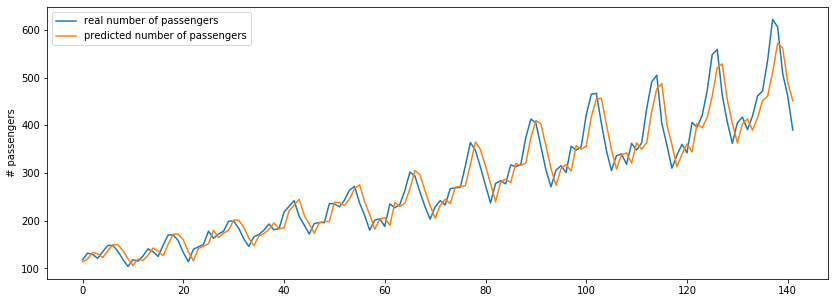

In [37]:
plt.figure(figsize=(14,5))
plt.plot(ytest, label = 'real number of passengers')
plt.plot(pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()
